# **Import required packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

## **Read the data**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/MLPROJECT/data.csv")

# **Performing EDA**

In [ ]:
df.shape

(50553, 12)

In [ ]:
df.head()


,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Gender                14600 non-null  object 
 11  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [ ]:
df.isnull().sum()

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

**Here as we can see that  Gender  Column Having more then 70% of  NaN value So We Drop that Gender Column**

In [ ]:
 df=df.drop(['Gender'], axis = 1) 
df=df.drop(['ID'], axis=1)

In [ ]:
df.describe()

,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,0.014658,49.425969,40.800977,9.83809,40.011236
std,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,0.000000,9.000000,18.000000,0.00000,35.000000
50%,0.000000,22.000000,26.500000,0.00000,36.000000
75%,0.000000,53.000000,48.000000,11.55000,44.000000
max,1.000000,4881.000000,810.000000,283.50000,118.000000


In [ ]:
df[df["Duration"] <0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
4063,JZI,Airlines,Online,Basic Plan,0,-1,BRUNEI DARUSSALAM,18.0,6.3,118
38935,JZI,Airlines,Online,Basic Plan,0,-1,INDONESIA,18.0,6.3,118
48367,JZI,Airlines,Online,Basic Plan,0,-2,BANGLADESH,22.0,7.7,118


In [ ]:
df[df["Age"] > 100]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
90,JWT,Airlines,Online,Value Plan,0,58,INDIA,78.0,31.20,118
108,JWT,Airlines,Online,Value Plan,0,15,INDIA,31.0,12.40,118
140,JWT,Airlines,Online,Value Plan,0,8,INDIA,39.0,15.60,118
153,JWT,Airlines,Online,Value Plan,0,4,INDIA,78.0,31.20,118
181,JWT,Airlines,Online,Value Plan,0,0,INDIA,31.0,12.40,118
...,...,...,...,...,...,...,...,...,...,...
50158,JWT,Airlines,Online,Value Plan,0,41,INDIA,60.0,24.00,118
50179,JWT,Airlines,Online,Value Plan,0,62,INDIA,31.0,12.40,118
50250,JWT,Airlines,Online,Value Plan,0,15,INDIA,31.0,12.40,118
50429,JZI,Airlines,Online,Basic Plan,0,19,SRI LANKA,35.0,12.25,118


In [ ]:
df[df["Net Sales"] <0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
6,JZI,Airlines,Online,Value Plan,0,23,JAPAN,-69.0,24.15,26
128,EPX,Travel Agency,Online,Cancellation Plan,0,192,CANADA,-80.0,0.00,37
139,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,55,CHINA,-77.0,0.00,46
173,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,198,NETHERLANDS,-9.9,5.94,31
336,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,109,AUSTRALIA,-19.8,11.88,31
...,...,...,...,...,...,...,...,...,...,...
50121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,81,JAPAN,-99.0,59.40,45
50149,ART,Airlines,Online,24 Protect,0,2,MALAYSIA,-1.4,0.49,118
50177,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,75,UNITED STATES,-49.5,29.70,49
50394,JZI,Airlines,Online,Basic Plan,0,15,VIET NAM,-22.0,7.70,57


In [ ]:
df.loc[df['Duration'] < 0, 'Duration'] = 49.425969
df.loc[df['Age'] > 100, 'Age'] = 40.011236
df.loc[df['Net Sales'] < 0, 'Net Sales'] = 40.800977

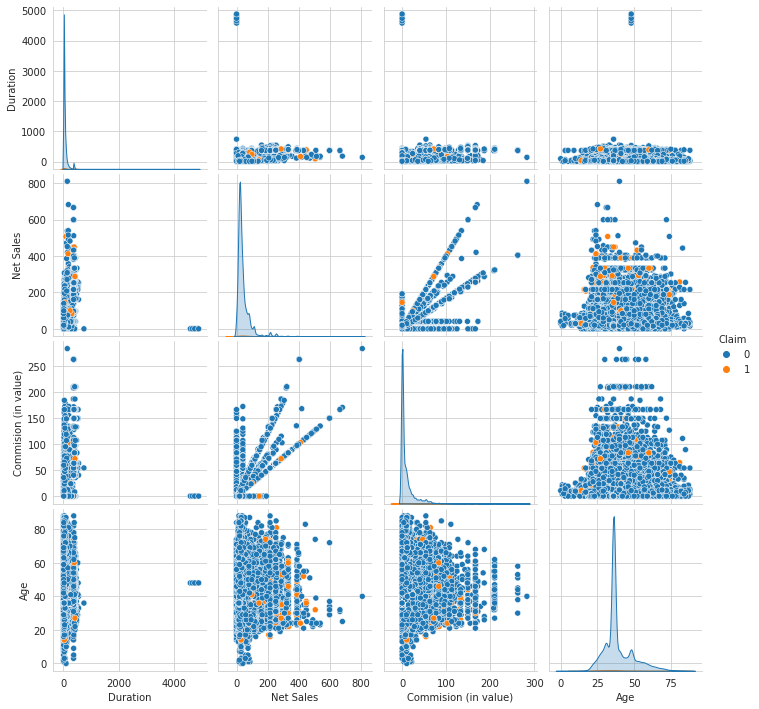

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Claim");
plt.show()

0    49812
1      741
Name: Claim, dtype: int64
---------------------------------------------------


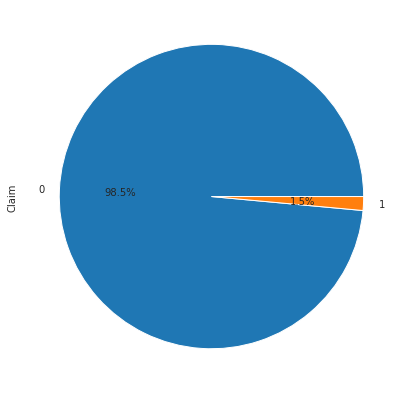

In [ ]:
print(df["Claim"].value_counts())
print("---------------------------------------------------")
plt.figure(figsize=(7,7))
df["Claim"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

# **Looking For Correlations**

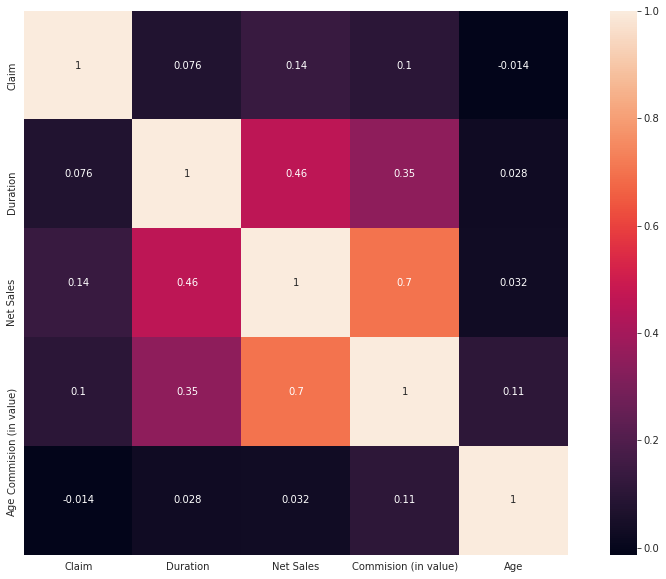

In [ ]:
 ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), square=True,annot=True)


**## Commision (in value) column having High Correlation between Feature 'Net Sales' and very Low Correlation with the 'Target' so we are Droping The Commision (in value) Column.**

In [ ]:
df=df.drop(['Commision (in value)'],axis=1)

In [ ]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Age
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7.0,MALAYSIA,0.0,31.0
1,EPX,Travel Agency,Online,Cancellation Plan,0,85.0,SINGAPORE,69.0,36.0
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11.0,MALAYSIA,19.8,75.0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16.0,INDONESIA,20.0,32.0
4,EPX,Travel Agency,Online,Cancellation Plan,0,10.0,"KOREA, REPUBLIC OF",15.0,29.0


## **Separating categorical and numerical data**

In [ ]:
df_num = df.select_dtypes(["int64","float64"])
df_cat = df.select_dtypes("object")

# **For df_num**

In [ ]:
df_num.head()

,Claim,Duration,Net Sales,Age
0,0,7.0,0.0,31.0
1,0,85.0,69.0,36.0
2,0,11.0,19.8,75.0
3,0,16.0,20.0,32.0
4,0,10.0,15.0,29.0


In [ ]:
df_num.describe()

,Claim,Duration,Net Sales,Age
count,50553.000000,50553.000000,50553.000000,50553.000000
mean,0.014658,49.428981,41.852794,38.784779
std,0.120180,101.433893,47.536249,10.049564
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,18.500000,35.000000
50%,0.000000,22.000000,27.000000,36.000000
75%,0.000000,53.000000,48.000000,42.000000
max,1.000000,4881.000000,810.000000,88.000000


# **Skewness**

In [ ]:
from scipy.stats import skew

Claim :- 8.076976414369875


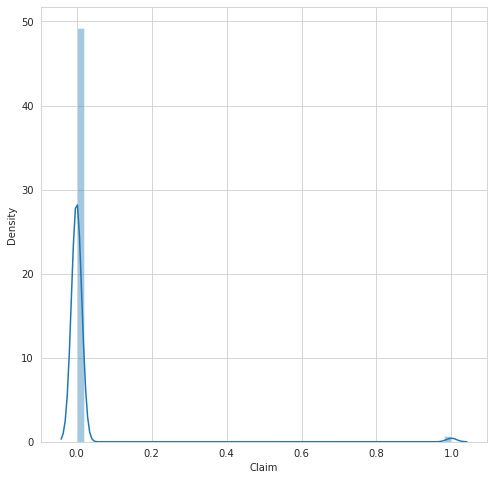

Duration :- 22.872492167935484


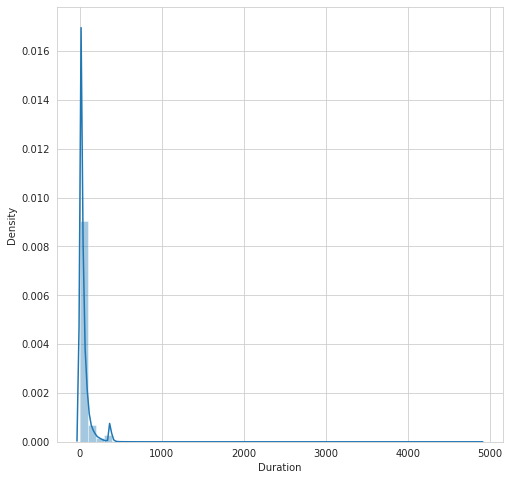

Net Sales :- 3.751192202882967


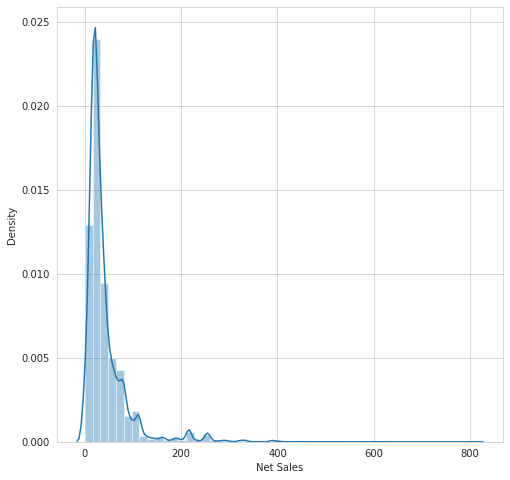

Age :- 1.2031538221807883


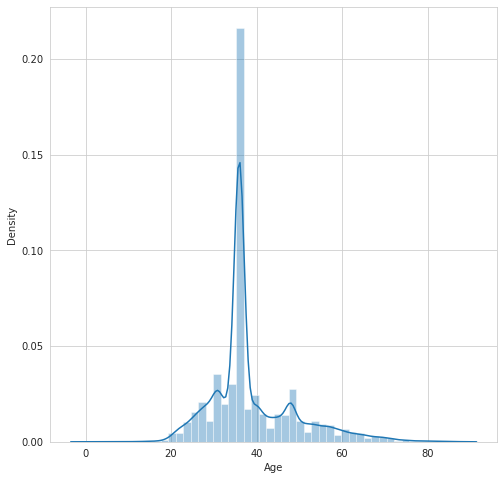

In [ ]:
for col in df_num:
  print(col,":-",skew(df_num[col]))
  plt.figure(figsize=(8,8))
  sns.distplot(df_num[col])
  plt.show()

In [ ]:
#removing skewness
for col in df_num:
  if skew(df_num[col]) >= 0.5 or skew(df_num[col]) <= -0.5:
    df_num[col] = np.sqrt(df_num[col])

Claim :- 8.076976414369875


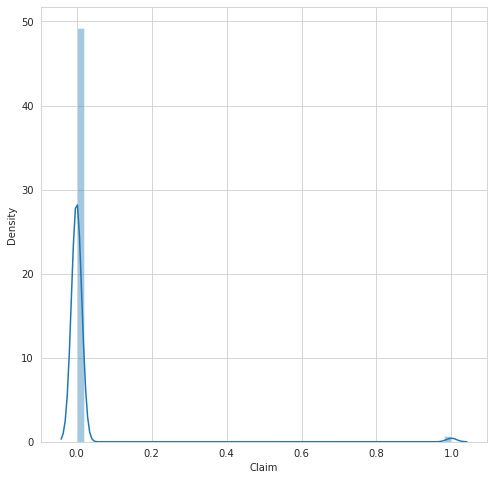

Duration :- 2.409425954993082


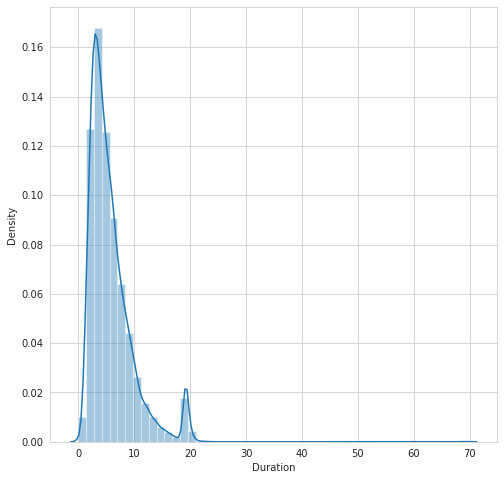

Net Sales :- 1.4439989184434878


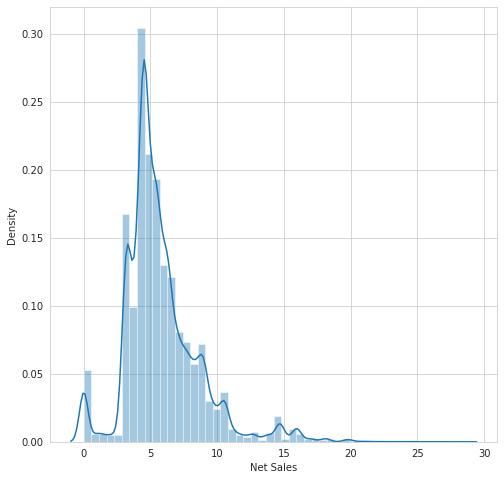

Age :- 0.6848711397302739


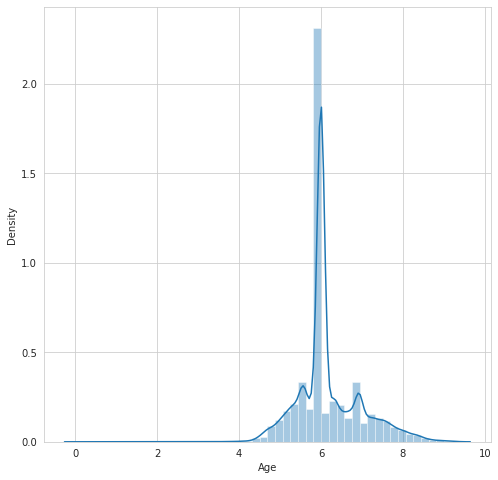

In [ ]:
for col in df_num:
  print(col,":-",skew(df_num[col]))
  plt.figure(figsize=(8,8))
  sns.distplot(df_num[col])
  plt.show()

# **Bivariate Analysis against the traget**

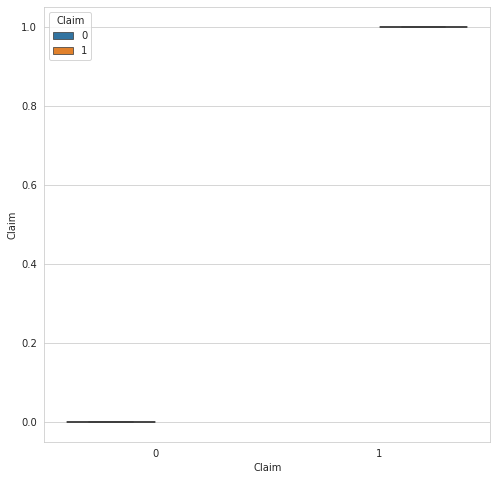

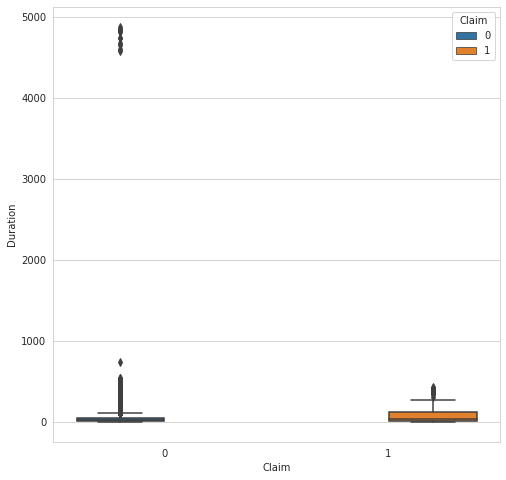

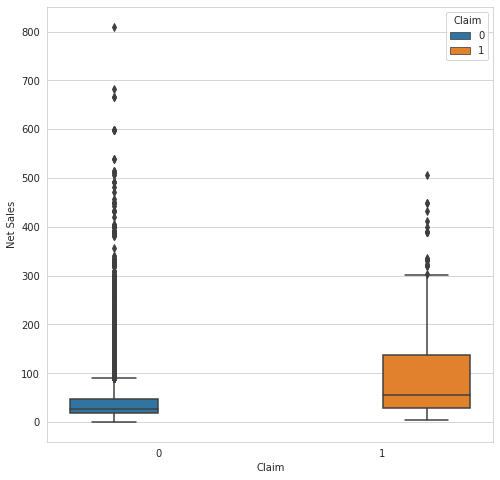

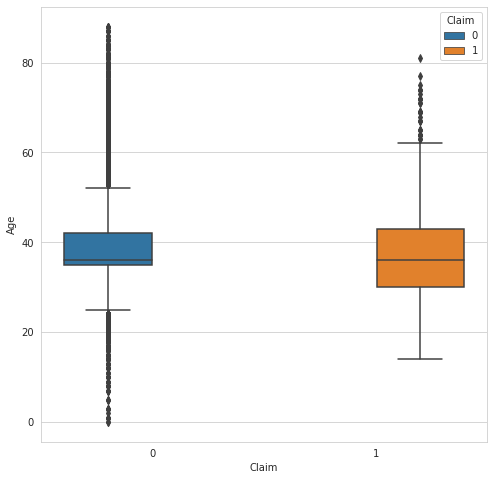

In [ ]:
for col in df_num:
  plt.figure(figsize=(8,8))
  sns.boxplot(data=df,x="Claim",y=col , hue='Claim')
  plt.show()

# **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
for col in df_num:
  ms = MinMaxScaler()
  df_num[col] = ms.fit_transform(df_num[[col]])

In [ ]:
df_num.head()

,Claim,Duration,Net Sales,Age
0,0.0,0.037870,0.000000,0.593526
1,0.0,0.131964,0.291865,0.639602
2,0.0,0.047472,0.156347,0.923186
3,0.0,0.057254,0.157135,0.603023
4,0.0,0.045263,0.136083,0.574060


# **For df_cat**

In [ ]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF"


Text(0.5, 1.0, 'Agency')

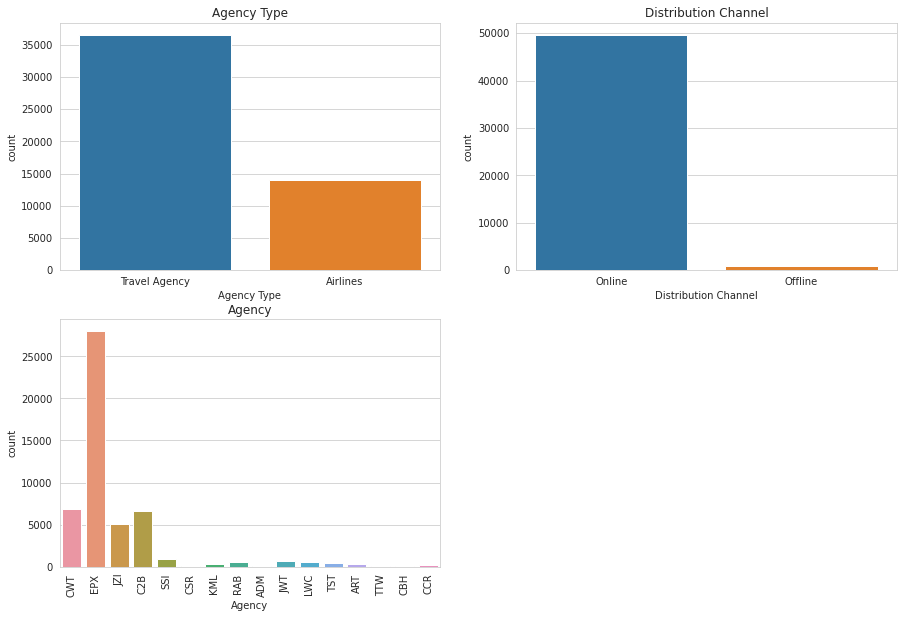

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(df['Agency Type'])
plt.title('Agency Type')
plt.subplot(2,2,2)
sns.countplot(df['Distribution Channel'])
plt.title('Distribution Channel')

plt.subplot(2,2,3)
sns.countplot(df['Agency'])
plt.xticks(rotation=90)
plt.title('Agency')

Text(0.5, 1.0, 'Destination')

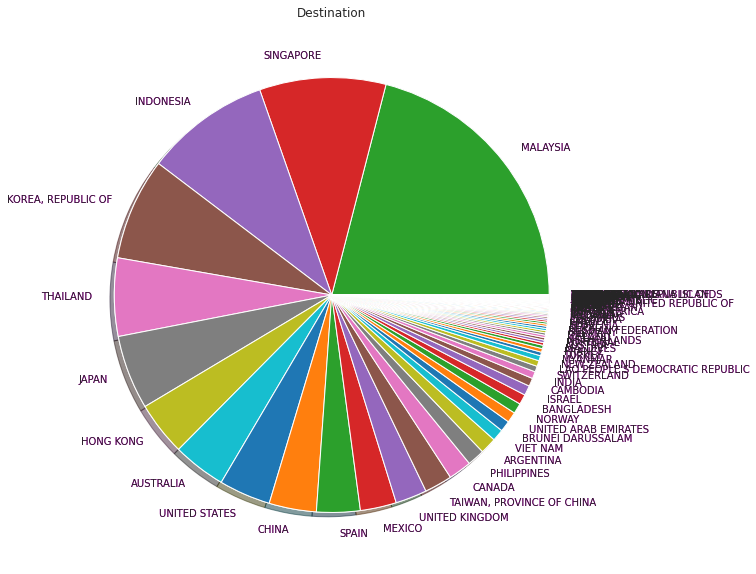

In [ ]:
plt.figure(figsize=(15,10))

wedges, texts = plt.pie(df['Destination'].value_counts(),    
                                  labels = df['Destination'].unique(), 
                                  shadow = True,
                                  textprops = dict(color ="magenta")) 
plt.pie(df['Destination'].value_counts(),labels=df['Destination'].unique())
plt.title('Destination')

Text(0.5, 1.0, 'Product Name')

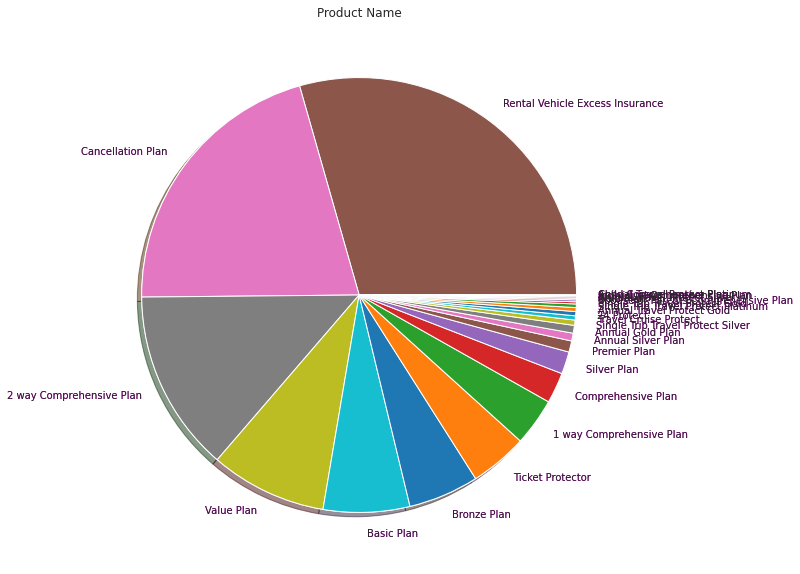

In [ ]:
plt.figure(figsize=(15,10))

wedges, texts = plt.pie(df['Product Name'].value_counts(),    
                                  labels = df['Product Name'].unique(), 
                                  shadow = True,
                                  textprops = dict(color ="magenta")) 
plt.pie(df['Product Name'].value_counts(),labels=df['Product Name'].unique())
plt.title('Product Name')

# **Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in df_cat:
  le = LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[[col]])

In [ ]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,6,1,1,16,56
1,7,1,1,10,79
2,6,1,1,16,56
3,7,1,1,1,38
4,7,1,1,10,47


# **Concatenate Both df_num and df_cat**

In [ ]:
df_new = pd.concat([df_num,df_cat], axis=1)

In [ ]:
df_new.head()

,Claim,Duration,Net Sales,Age,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,0.0,0.037870,0.000000,0.593526,6,1,1,16,56
1,0.0,0.131964,0.291865,0.639602,7,1,1,10,79
2,0.0,0.047472,0.156347,0.923186,6,1,1,16,56
3,0.0,0.057254,0.157135,0.603023,7,1,1,1,38
4,0.0,0.045263,0.136083,0.574060,7,1,1,10,47


In [ ]:
X = df_new.drop("Claim",axis=1)
y = df_new["Claim"]

# **Train-Test Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# **Baseline Model**

### **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     14961
         1.0       0.00      0.00      0.00       205

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166



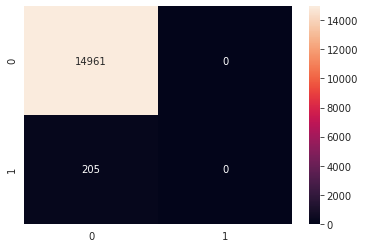

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

# **Using  RandomOverSampler  to Balanced the training data**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=1)

In [ ]:
X_sample1, y_sample1 = ros.fit_sample(X_train,y_train)

In [ ]:
pd.Series(y_sample1).value_counts()

1.0    34851
0.0    34851
dtype: int64

In [ ]:
lr2 = LogisticRegression()
lr2.fit(X_sample1, y_sample1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred1= lr2.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90     14961
         1.0       0.05      0.63      0.08       205

    accuracy                           0.81     15166
   macro avg       0.52      0.73      0.49     15166
weighted avg       0.98      0.81      0.89     15166



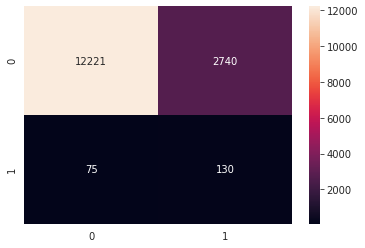

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, fmt='d')
plt.show()


# **Under Sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=1)

In [ ]:
X_sample2, y_sample2 = rus.fit_sample(X_train,y_train)

In [ ]:
pd.Series(y_sample2).value_counts()

1.0    536
0.0    536
dtype: int64

In [ ]:
lr3 = LogisticRegression()
lr3.fit(X_sample2, y_sample2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred2 = lr2.predict(X_test)

In [ ]:

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90     14961
         1.0       0.05      0.63      0.08       205

    accuracy                           0.81     15166
   macro avg       0.52      0.73      0.49     15166
weighted avg       0.98      0.81      0.89     15166



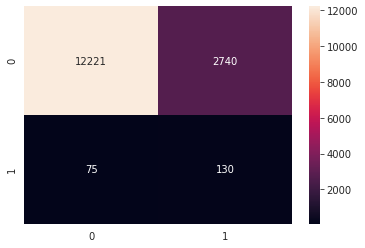

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d')
plt.show()


# **Decision Tree**

**Here we use DecisionTree with  RandomOverSampler Technique to Balanced The DataFrame and to get classification report**


In [ ]:
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
ros = RandomOverSampler(random_state=1)

In [ ]:
X_sample3, y_sample3 = ros.fit_sample(X_train,y_train)

In [ ]:
pd.Series(y_sample3).value_counts()

1.0    34851
0.0    34851
dtype: int64

In [ ]:
dtc= DecisionTreeClassifier(max_depth=8 ,min_samples_leaf=50,criterion="entropy")
dtc.fit(X_sample3, y_sample3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred3 = dtc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.99      0.77      0.87     14961
         1.0       0.04      0.62      0.07       205

    accuracy                           0.77     15166
   macro avg       0.51      0.70      0.47     15166
weighted avg       0.98      0.77      0.86     15166



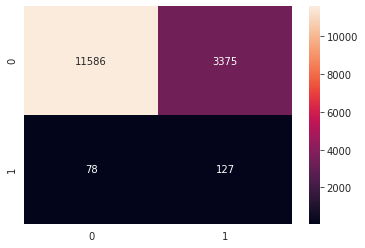

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, fmt='d')
plt.show()

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ros = RandomOverSampler(random_state=1)

In [ ]:
X_sample4, y_sample4 = ros.fit_sample(X_train,y_train)

In [ ]:
pd.Series(y_sample4).value_counts()

1.0    34851
0.0    34851
dtype: int64

In [ ]:
rtc= RandomForestClassifier(n_estimators=100,random_state=1,max_features=8,max_depth=5)
rtc.fit(X_sample4, y_sample4)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
y_pred4 = rtc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90     14961
         1.0       0.05      0.63      0.09       205

    accuracy                           0.82     15166
   macro avg       0.52      0.72      0.49     15166
weighted avg       0.98      0.82      0.89     15166



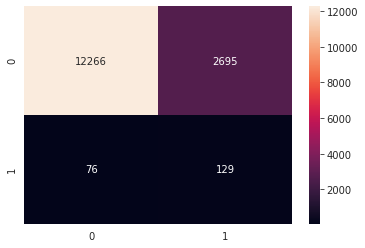

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True, fmt='d')
plt.show()


# **Gradient Boosting Classifier**



In [ ]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
ros = RandomOverSampler(random_state=1)

In [ ]:
X_sample5, y_sample5 = ros.fit_sample(X_train,y_train)

In [ ]:
pd.Series(y_sample5).value_counts()

1.0    34851
0.0    34851
dtype: int64

In [ ]:
gb=GradientBoostingClassifier(n_estimators=100)

In [ ]:
gb.fit(X_sample5, y_sample5)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred5 = gb.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90     14961
         1.0       0.05      0.61      0.08       205

    accuracy                           0.82     15166
   macro avg       0.52      0.72      0.49     15166
weighted avg       0.98      0.82      0.89     15166



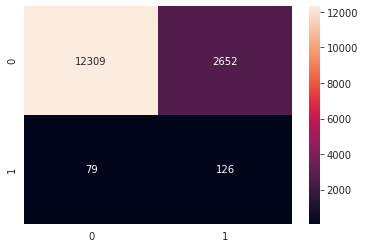

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred5), annot=True, fmt='d')
plt.show()


# **Adaboost Boosting Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ros = RandomOverSampler(random_state=1)

In [ ]:
X_sample6, y_sample6 = ros.fit_sample(X_train,y_train)

In [ ]:
pd.Series(y_sample5).value_counts()

1.0    34851
0.0    34851
dtype: int64

In [ ]:
ab=AdaBoostClassifier(n_estimators=100)

In [ ]:
ab.fit(X_sample6, y_sample6)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [ ]:
y_pred6 = ab.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89     14961
         1.0       0.04      0.66      0.08       205

    accuracy                           0.80     15166
   macro avg       0.52      0.73      0.48     15166
weighted avg       0.98      0.80      0.88     15166



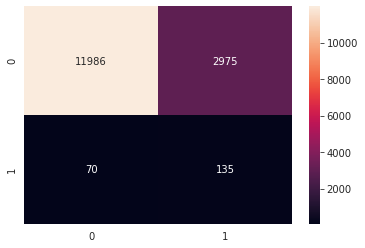

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred6), annot=True, fmt='d')
plt.show()